---
title: "Hiển thị Jupyter notebook trên Hugo như thế nào?"
date: 2024-01-21T23:23:47+07:00

categories:
  - Một vài thử nghiệm nhỏ

---

Ừ thì mình là Machine Learning Engineer (thậm chí thỉnh thoảng còn được gọi là Data Scientist :v) thế mà không viết blog về ML rồi toán rồi data các thứ nghe nó cũng không hợp lý cho lắm. Nhưng giờ viết lý thuyết thì chẳng ai đọc mà viết về thực nghiệm thì phải có cách nào hiển thị cái notebook cho nó đẹp một chút chứ :))))


Thế với ý tưởng xl trên, mình thử search tầm 15p và có luôn cách cực kỳ đơn giản được giới thiệu trong <https://miguelrodrigues.org/post/jupyter/>, đại thể là sẽ dùng `nbconvert` để convert jupyter notebook markdown, sau đó sẽ Hugo render như bình thường, ví dụ như ngay bài viết này được render từ [notebook này](./index.ipynb)

OK ngon, vậy thì để xem nó sẽ trông như thế nào :)))

## Biểu đồ các thứ

Thứ đầu tiên mà mình sẽ thử tất nhiên là thư viện vẽ biểu đồ quốc dân `matplotlib` rồi :b Nhìn chung thì cũng khá ổn, mình vẽ barchart thì biểu đồ này hiển thị đúng như những gì có trong notebook. Cách `nbconvert` xử lý khá hợp lý, khi mà biểu đồ được export ra thành ảnh và nhúng vào trang markdown.



In [1]:
import matplotlib.pyplot as plt

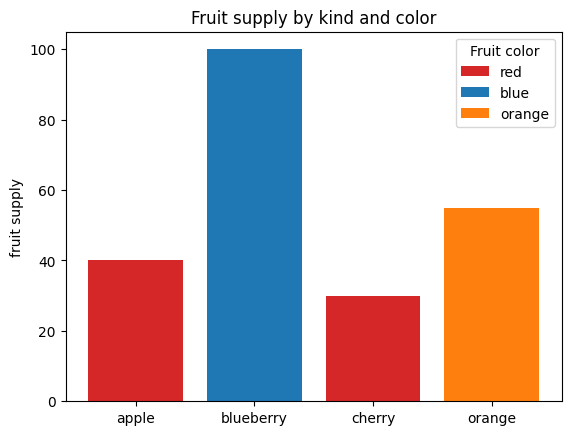

In [2]:
fig, ax = plt.subplots()

fruits = ["apple", "blueberry", "cherry", "orange"]
counts = [40, 100, 30, 55]
bar_labels = ["red", "blue", "_red", "orange"]
bar_colors = ["tab:red", "tab:blue", "tab:red", "tab:orange"]

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel("fruit supply")
ax.set_title("Fruit supply by kind and color")
ax.legend(title="Fruit color")

plt.show()

Vậy còn biểu đồ có tương tác thì sao, mình có thử `plotly` để vẽ một ví dụ bằng đoạn code như sau:

In [3]:
import plotly.express as px

df = px.data.gapminder()
px.scatter(
    df,
    x="gdpPercap",
    y="lifeExp",
    animation_frame="year",
    animation_group="country",
    size="pop",
    color="continent",
    hover_name="country",
    log_x=True,
    size_max=55,
    range_x=[100, 100000],
    range_y=[25, 90],
)

Khá là đáng buồn khi nbconvert sẽ không convert được biểu đồ của plotly khi chúng ta sẽ thu được log nói rằng loại mime có tên là `application/vnd.plotly.v1+json` không được hỗ trợ như sau:

```bash
jupyter nbconvert --to markdown --NbConvertApp.output_files_dir=. index.ipynb
[NbConvertApp] Converting notebook index.ipynb to markdown
/Users/niits/miniconda3/share/jupyter/nbconvert/templates/base/display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.plotly.v1+json']) is not able to be represented.
  {%- elif type == 'text/vnd.mermaid' -%}
[NbConvertApp] Support files will be in ./
[NbConvertApp] Writing 515582 bytes to index.md
```

Vậy nên biểu đồ dưới đây sẽ không được hiển thị khi convert notebook sang markdown :(

![plotly](./plotly.png)

## Một vài thứ khác

Ừ thì hiển thị được biểu đồ của `matplotlib` cũng khá OK rồi chứ button các thứ của IPython là chắc kèo không có tác dụng rồi. Tuy vậy mình vẫn muốn thử một vài thứ nữa kiểu Audio chẳng hạn. Kết quả thì khá bất ngờ khi `nbconvert` convert byte data của file audio thành base64, sau đó đặt luôn trong file markdown. Thôi thì méo mó có hơn không, demo file có vài giây chắc cũng không năng quá đâu :v

In [4]:
from IPython.display import Audio
Audio('https://ccrma.stanford.edu/workshops/mir2014/audio/CongaGroove-mono.wav')

## Tổng kết

Ờ thì việc hiển thị notebook có vẻ có hope. Chắc là trong tương lai mình sẽ viết mấy bài nho nhỏ để code các thứ linh tinh. Nội dung thì đến đây là hết rồi nhé chứ chẳng có gì để viết nữa đâu :v